# Machine Learning and Fintech HW7

### import module

In [1]:
import pandas as pd
import numpy as np
# draw graph
import matplotlib.pyplot as plt
import seaborn as sns
# standardize the Data
from sklearn.preprocessing import StandardScaler
# PCA
from sklearn.decomposition import PCA

### AirQualityUCI
##### Missing values are tagged with -200 value.
0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity

In [2]:
# read csv
dataset = pd.read_csv('AirQualityUCI.csv')

## 1. Please do a simple EDA for the dataset.

In [3]:
# see a part of data
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004/3/10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004/3/10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004/3/10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004/3/10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004/3/10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### drop the data which are information not data for analysis

In [4]:
drop_col = list(set(dataset.columns) - set(dataset._get_numeric_data().columns))

In [5]:
dataset = dataset.drop(columns=drop_col, axis=1)

In [6]:
# see a part of data
dataset.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### process missing data (missing values are tagged with -200 value)

In [7]:
missing_value = -200
n_missing_value_row = len(dataset[dataset.eq(missing_value).any(1)].index)
print('The number of the rows which include missing data:', n_missing_value_row)

The number of the rows which include missing data: 8530


- Since the number of the rows which include missing data is too much, and the tag of the missing data is little enough and far enough from the normal data, I decide not to process them.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(5), int64(8)
memory usage: 950.4 KB


In [9]:
print('shape:', dataset.shape)

shape: (9357, 13)


In [10]:
print('null:')
print(dataset.isnull().sum())

null:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


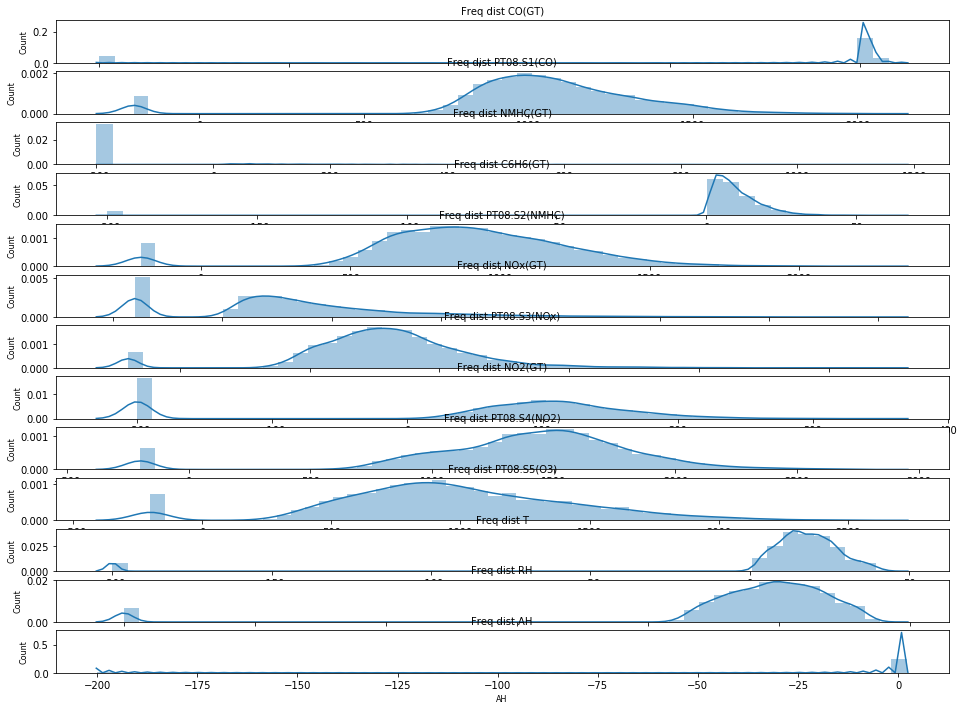

In [11]:
fig, ax = plt.subplots(len(dataset.columns), figsize=(16, 12))
for i, col_val in enumerate(dataset.columns):
    sns.distplot(dataset[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.show()

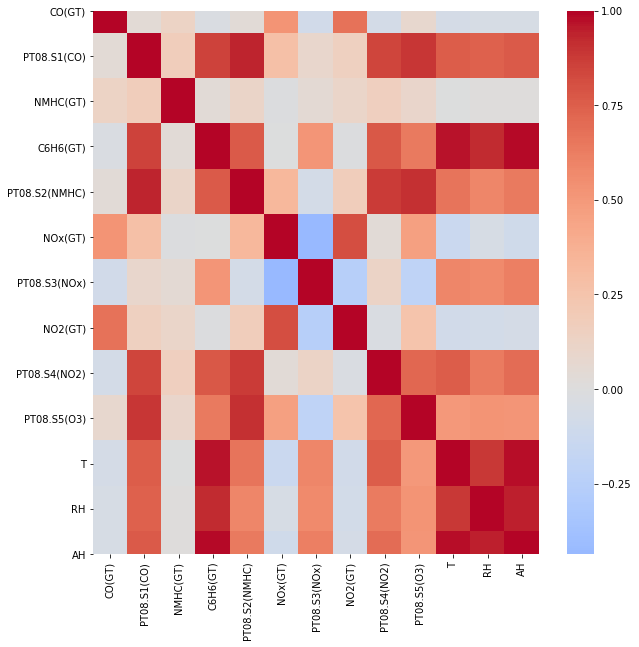

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=False, center=0.0, cmap='coolwarm'); # cmap="YlGnBu",
plt.show()

In [13]:
print('unique:')
print(dataset.nunique())

unique:
CO(GT)             97
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
dtype: int64


### Standardize the Data

In [14]:
# Standardizing the features
std_dataset = StandardScaler().fit_transform(dataset)
std_dataset_df = pd.DataFrame(std_dataset, columns=dataset.columns )
std_dataset_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.183831,0.194881
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.160400,0.194052
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.283414,0.194686
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.400571,0.195622
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.392761,0.195676


## 2. Do the principal components analysis with 2 components.

### PCA Projection to 2D

- In general, we do the scree plot first  to choose the number of components in PCA.
- To visualize the PCA , just choose 2 components in this demo, so the students can easily get the point.

In [15]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(std_dataset_df)
principal_df = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-1.365151,0.569067
1,-0.907059,-0.064023
2,-1.089141,0.193355
3,-1.193349,0.420985
4,-0.849168,-0.004827


## 3. According to the result of Q2, visualize it into 2D projection.

### Visualize 2D Projection

- This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

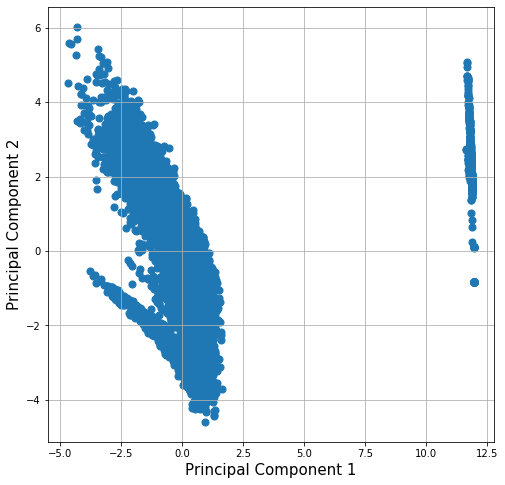

In [16]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)

ax.scatter(principal_df['principal component 1'], principal_df['principal component 2'], s=50)
ax.grid()

In [17]:
print('explained_variance_ratio:', pca.explained_variance_ratio_)

explained_variance_ratio: [0.50652352 0.22652556]


## 4. Use scree plot to choose the number of principal components, and illustrate how you choose clearly.

### Remark：Scree Plot

#### Standardize the Dataset

- We had do it at the top.

#### Create a Covariance Matrix

In [18]:
covar_matrix = PCA(n_components = len(dataset.columns))

#### Calculate Eigenvalues

In [19]:
# calculate variance ratios
covar_matrix.fit(std_dataset)
variance_ratio = covar_matrix.explained_variance_ratio_
print('variance ratios:', variance_ratio)

variance ratios: [5.06523519e-01 2.26525557e-01 1.08371552e-01 7.94070000e-02
 3.02886250e-02 1.92878210e-02 1.01207231e-02 8.12904647e-03
 5.88489666e-03 3.06204058e-03 2.17064196e-03 2.00615164e-04
 2.79618785e-05]


In [20]:
# cumulative sum of variance explained with [n] features
cumulative_sum_of_variance_explained = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=4) * 100)
cumulative_sum_of_variance_explained = np.insert(cumulative_sum_of_variance_explained, 0, 0)
print('cumulative sum of variance explained with n features:', cumulative_sum_of_variance_explained)

cumulative sum of variance explained with n features: [  0.    50.65  73.3   84.14  92.08  95.11  97.04  98.05  98.86  99.45
  99.76  99.98 100.   100.  ]


#### Sort & Select

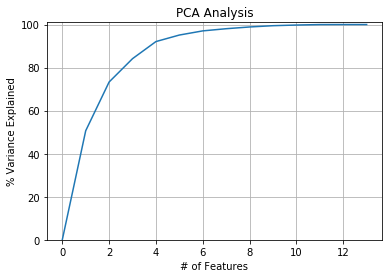

In [21]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0, 101)
plt.style.context('seaborn-whitegrid')

plt.grid()
plt.plot(cumulative_sum_of_variance_explained)

### the number of principal components

In [22]:
n_principal_components = np.min(np.argwhere(cumulative_sum_of_variance_explained > 80))
print('The number of principal components I choose:', n_principal_components)

The number of principal components I choose: 3


- According to the 80 - 20 rule, I choose the number of principal components to be 3 because the cumulative sum of variance explained with 3 features is the least number which is bigger than 80.

## 5. According to the Q4, rebulid the model by the principal components you choose.

In [23]:
pca = PCA(n_components = n_principal_components)
principalComponents = pca.fit_transform(std_dataset_df)
principal_df = pd.DataFrame(data = principalComponents, columns = [f'principal component {i + 1}' for i in range(n_principal_components)])
principal_df.head()

,principal component 1,principal component 2,principal component 3
0,-1.365151,0.569067,-0.438904
1,-0.907059,-0.064023,-0.854908
2,-1.089141,0.193355,-0.791222
3,-1.193349,0.420985,-0.683499
4,-0.849168,-0.004827,-1.037992


In [24]:
print('explained_variance_ratio:', pca.explained_variance_ratio_)

explained_variance_ratio: [0.50652352 0.22652556 0.10837155]
